# Vehicle loan prediction (Growth Source Financial recruitment task)
## A Predictive Model by 
## Arshan Khan
## Post Graduate Student of data science 
## Praxis Business School Bangalore

## Problem Defination
Problem statement  develop an algorithm to predict the default of a customer for vehicle loans By identifying key attritubes.

Motivation : Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. 

In [1]:
#load packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rnd

####  Load Data Modelling Libraries
We will use the popular scikit-learn library to develop our machine learning algorithms and for data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [2]:
#Common Model Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn import tree

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

### Data preparation
To begin this step, The data is imported firstly . Next we use the info()function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). Click here for the [Source Data Dictionary](https://www.kaggle.com/sneharshinde/ltfs-av-data).

In [3]:
train_df= pd.read_csv('C:/Users/Admin/Downloads/train.csv~/train.csv')
test_df= pd.read_csv('C:/Users/Admin/Downloads/test_bqCt9Pv.csv~/test_bqCt9Pv.csv')

In [4]:
# train_df
# preview the data

train_df.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [5]:
# train_df
#data info

train_df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [6]:
# train_df
# data describe

train_df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
# train_df
# data describe for object

categorical_varaibles=train_df.describe(include=['O'])
categorical_varaibles

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,233154,225493,233154,233154,233154,233154
unique,15433,2,84,20,192,294
top,01-01-88,Self employed,31-10-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,127635,8826,116950,119373,119127


In [8]:
print(test_df.shape,train_df.shape)

(112392, 40) (233154, 41)


### checking missing values

In [9]:
#checking missing values(in percentage) in test data
print(train_df.isnull().sum()*100/train_df.shape[0])

UniqueID                               0.000000
disbursed_amount                       0.000000
asset_cost                             0.000000
ltv                                    0.000000
branch_id                              0.000000
supplier_id                            0.000000
manufacturer_id                        0.000000
Current_pincode_ID                     0.000000
Date.of.Birth                          0.000000
Employment.Type                        3.285811
DisbursalDate                          0.000000
State_ID                               0.000000
Employee_code_ID                       0.000000
MobileNo_Avl_Flag                      0.000000
Aadhar_flag                            0.000000
PAN_flag                               0.000000
VoterID_flag                           0.000000
Driving_flag                           0.000000
Passport_flag                          0.000000
PERFORM_CNS.SCORE                      0.000000
PERFORM_CNS.SCORE.DESCRIPTION          0

In [10]:
#checking missing values(in percentage) in test data
print(test_df.isnull().sum()*100/test_df.shape[0])

UniqueID                               0.000000
disbursed_amount                       0.000000
asset_cost                             0.000000
ltv                                    0.000000
branch_id                              0.000000
supplier_id                            0.000000
manufacturer_id                        0.000000
Current_pincode_ID                     0.000000
Date.of.Birth                          0.000000
Employment.Type                        3.063385
DisbursalDate                          0.000000
State_ID                               0.000000
Employee_code_ID                       0.000000
MobileNo_Avl_Flag                      0.000000
Aadhar_flag                            0.000000
PAN_flag                               0.000000
VoterID_flag                           0.000000
Driving_flag                           0.000000
Passport_flag                          0.000000
PERFORM_CNS.SCORE                      0.000000
PERFORM_CNS.SCORE.DESCRIPTION          0

#### we can see that in both trian and test data we have one variable that is Employment.Type which has less than 4 percent of missing data we can hence we can do mode imputation for the same 

In [11]:
train_df = train_df.fillna(train_df.mode().iloc[0])
test_df = test_df.fillna(test_df.mode().iloc[0])

In [12]:
print(train_df['Employment.Type'].isnull().sum(),test_df['Employment.Type'].isnull().sum())

0 0


##### Note :we could have gone for complete case analysis (Removing all records corresponding to the missing value column) but that wouldnt be favorable because we will be losing all the information vital to our analysis as a result of those removed records. so imputation seems to be the best case scenario


In [13]:
test_df.shape

(112392, 40)

In [14]:
train_df.shape

(233154, 41)

###  checking for unique attributes 

In [15]:
train_df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

#### from the above information we can straightaway say that the variable MobileNo_Avl_Flag is not going to provide any unique information to our predictive since it has only 1 class hence we can drop that variable

In [16]:
train_df=train_df.drop(columns ='MobileNo_Avl_Flag')


In [17]:
test_df=test_df.drop(columns ='MobileNo_Avl_Flag')

In [18]:
#lets get all the categorical train data present 
str_cols = train_df.select_dtypes(include = 'object').columns
train_df[str_cols].head()

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-84,Salaried,03-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,31-07-85,Self employed,26-09-18,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,24-08-85,Self employed,01-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,30-12-93,Self employed,26-10-18,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,09-12-77,Self employed,26-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [19]:
#lets get all the categorical test data 
str_cols = test_df.select_dtypes(include = 'object').columns
test_df[str_cols].head()

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-74,Salaried,03-11-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,20-05-85,Self employed,20-11-18,C-Very Low Risk,0yrs 8mon,1yrs 0mon
2,14-10-95,Salaried,29-11-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,01-06-73,Self employed,29-11-18,Not Scored: Only a Guarantor,2yrs 5mon,2yrs 5mon
4,01-06-72,Salaried,17-11-18,No Bureau History Available,0yrs 0mon,0yrs 0mon


#### here we can see the following insights
1. We need to change the date and time related variables  (Date.of.Birth, DisbursalDate,AVERAGE.ACCT.AGE and AVERAGE.ACCT.AGE)  to int 
2. Employment.Type has 2 classes we need to label encode it 
3. The beauruea data history is given under the variable PERFORM_CNS.SCORE.DESCRIPTION with 20 distinct classes  we need to figure out a way to encode it such that its acceptable to our model

In [20]:
train_df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.AC

### converting date and time related variables to int

In [21]:
#For our analysis we need to change date of birth to age so that its more relevant and acceptable to the model
now = pd.Timestamp('now')
train_df['Date.of.Birth'] = pd.to_datetime(train_df['Date.of.Birth'], format='%d-%m-%y')
train_df['Date.of.Birth'] = train_df['Date.of.Birth'].where(train_df['Date.of.Birth'] < now, train_df['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
train_df['Age'] = (now - train_df['Date.of.Birth']).astype('<m8[Y]')
train_df=train_df.drop('Date.of.Birth',axis=1)
#doing the same for our test data
now = pd.Timestamp('now')
test_df['Date.of.Birth'] = pd.to_datetime(test_df['Date.of.Birth'], format='%d-%m-%y')
test_df['Date.of.Birth'] = test_df['Date.of.Birth'].where(test_df['Date.of.Birth'] < now, test_df['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
test_df['Age'] = (now - test_df['Date.of.Birth']).astype('<m8[Y]')
test_df=test_df.drop('Date.of.Birth',axis=1)

In [22]:
train_df['Age'].head(5)

0    36.0
1    35.0
2    35.0
3    26.0
4    42.0
Name: Age, dtype: float64

In [23]:
test_df['Age'].head(5)

0    46.0
1    35.0
2    24.0
3    47.0
4    48.0
Name: Age, dtype: float64

In [24]:
#For our analysis we need to change date of birth to age so that its more relevant and acceptable to the model
now = pd.Timestamp('now')
train_df['DisbursalDate'] = pd.to_datetime(train_df['DisbursalDate'], format='%d-%m-%y')
train_df['DisbursalDate'] = train_df['DisbursalDate'].where(train_df['DisbursalDate'] < now, train_df['DisbursalDate'] -  np.timedelta64(100, 'Y'))
train_df['time_since_loan_dispursed_in_yrs'] = (now - train_df['DisbursalDate']).astype('<m8[Y]')
train_df=train_df.drop('DisbursalDate',axis=1)

#For our analysis we need to change date of birth to age so that its more relevant and acceptable to the model
now = pd.Timestamp('now')
test_df['DisbursalDate'] = pd.to_datetime(test_df['DisbursalDate'], format='%d-%m-%y')
test_df['DisbursalDate'] = test_df['DisbursalDate'].where(test_df['DisbursalDate'] < now, test_df['DisbursalDate'] -  np.timedelta64(100, 'Y'))
test_df['time_since_loan_dispursed_in_yrs'] = (now - test_df['DisbursalDate']).astype('<m8[Y]')
test_df=test_df.drop('DisbursalDate',axis=1)

In [25]:
print(train_df['time_since_loan_dispursed_in_yrs'].head(10),test_df['time_since_loan_dispursed_in_yrs'].head(10))

0    2.0
1    2.0
2    2.0
3    1.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: time_since_loan_dispursed_in_yrs, dtype: float64 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: time_since_loan_dispursed_in_yrs, dtype: float64


## so far so good :)

In [26]:
#so whats left now.....lets get all the categorical test data 
str_cols = test_df.select_dtypes(include = 'object').columns
test_df[str_cols].head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,Salaried,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,Self employed,C-Very Low Risk,0yrs 8mon,1yrs 0mon
2,Salaried,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,Self employed,Not Scored: Only a Guarantor,2yrs 5mon,2yrs 5mon
4,Salaried,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [27]:
#Creating a function for encoding features with only 2 classes (we have only 1 variable like that but still a useful function in case we need in the future)
def two_feat_encoding(df_to_transform):
    le = LabelEncoder()

    for cols in df_to_transform:
        if df_to_transform[cols].dtype == 'object':
            if len(list(df_to_transform[cols].unique())) == 2:
                le.fit(df_to_transform[cols])
                df_to_transform[cols] = le.transform(df_to_transform[cols])
    return df_to_transform
train_df=two_feat_encoding(train_df)
test_df=two_feat_encoding(test_df)

In [28]:
#yet again..... whats left now.....lets get all the categorical test data 
str_cols = test_df.select_dtypes(include = 'object').columns
test_df[str_cols].head()

,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,C-Very Low Risk,0yrs 8mon,1yrs 0mon
2,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,Not Scored: Only a Guarantor,2yrs 5mon,2yrs 5mon
4,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [29]:
# for PERFORM_CNS_SCORE_DESCRIPTION we can reduce the 20 classes by replacing wherever risk information
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['Not Scored: More than 50 active Accounts found','No Bureau History Available','Not Scored: No Activity seen on the customer (Inactive)','Not Scored: No Updates available in last 36 months','Not Enough Info available on the customer','Not Scored: Only a Guarantor','Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer'], value= 'No_score', inplace = True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=['Not Scored: More than 50 active Accounts found','No Bureau History Available','Not Scored: No Activity seen on the customer (Inactive)','Not Scored: No Updates available in last 36 months','Not Enough Info available on the customer','Not Scored: Only a Guarantor','Not Scored: Sufficient History Not Available','Not Scored: Not Enough Info available on the customer'], value= 'No_score', inplace = True)


In [30]:
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].nunique()

14

#### still a lot of classes :(...... lets try to reduce further..

#### we can see that within the classes we have 'A-very Low risk', 'B-Very Low risk'......and so one till 'M-Very High risk'  since we trying to simplify our model as much as possible we will reduce these features further. From a finance standpoint a high risk means high Probability of default so we will assign the following values to risk information
#### No_score = 0
#### 'A-Very Low Risk','B-Very Low Risk','C-Very Low Risk','D-Very Low Risk' = 1
#### 'E-Low Risk','F-Low Risk','G-Low Risk' = 2
#### 'H-Medium Risk','I-Medium Risk = 3
#### 'J-High Risk','K-High Risk' = 4 
#### 'L-Very High Risk','M-Very High Risk' = 5


In [31]:

vlow_risk=['A-Very Low Risk','B-Very Low Risk','C-Very Low Risk','D-Very Low Risk']
low_risk= ['E-Low Risk','F-Low Risk','G-Low Risk']
mid_risk= ['H-Medium Risk','I-Medium Risk']
high_risk= ['J-High Risk','K-High Risk']
vhigh_risk=['L-Very High Risk','M-Very High Risk']

train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace='No_score',value = 0,inplace = True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace='No_score',value = 0,inplace = True)
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=vlow_risk, value= 1, inplace = True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=vlow_risk, value= 1, inplace = True)
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=low_risk, value= 2, inplace = True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=low_risk, value= 2, inplace = True)
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=mid_risk, value= 3, inplace = True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=mid_risk, value= 3, inplace = True)
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=high_risk, value= 4, inplace = True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=high_risk, value= 4, inplace = True)
train_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=vhigh_risk, value= 5, inplace = True)
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=vhigh_risk, value= 5, inplace = True)


In [32]:
test_df['PERFORM_CNS.SCORE.DESCRIPTION'].head()

0    0
1    1
2    0
3    0
4    0
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [33]:
#now yet again..... whats left now.....lets get all the categorical train data 
str_cols = test_df.select_dtypes(include = 'object').columns
train_df[str_cols].head()

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon


In [34]:
train_df[['AVERAGE.ACCT.AGE_1','AVERAGE.ACCT.AGE_2']]=train_df['AVERAGE.ACCT.AGE'].str.split(expand=True)
test_df[['AVERAGE.ACCT.AGE_1','AVERAGE.ACCT.AGE_2']]=test_df['AVERAGE.ACCT.AGE'].str.split(expand=True)
train_df=train_df.drop(columns ='AVERAGE.ACCT.AGE')
test_df=test_df.drop(columns ='AVERAGE.ACCT.AGE')

In [35]:
train_df[['CREDIT.HISTORY.LENGTH_1','CREDIT.HISTORY.LENGTH_2']]=train_df['CREDIT.HISTORY.LENGTH'].str.split(expand=True)
test_df[['CREDIT.HISTORY.LENGTH_1','CREDIT.HISTORY.LENGTH_2']]=test_df['CREDIT.HISTORY.LENGTH'].str.split(expand=True)
train_df=train_df.drop(columns ='CREDIT.HISTORY.LENGTH')
test_df=test_df.drop(columns ='CREDIT.HISTORY.LENGTH')

In [36]:
#so whats left now.....lets get all the categorical test data 
str_cols = train_df.select_dtypes(include = 'object').columns
train_df[str_cols].head()

,AVERAGE.ACCT.AGE_1,AVERAGE.ACCT.AGE_2,CREDIT.HISTORY.LENGTH_1,CREDIT.HISTORY.LENGTH_2
0,0yrs,0mon,0yrs,0mon
1,1yrs,11mon,1yrs,11mon
2,0yrs,0mon,0yrs,0mon
3,0yrs,8mon,1yrs,3mon
4,0yrs,0mon,0yrs,0mon


In [37]:
#stripping months and years
train_df['CREDIT.HISTORY.LENGTH_1']=train_df['CREDIT.HISTORY.LENGTH_1'].str.strip('yrs')
test_df['CREDIT.HISTORY.LENGTH_1']=test_df['CREDIT.HISTORY.LENGTH_1'].str.strip('yrs')
train_df['CREDIT.HISTORY.LENGTH_2']=train_df['CREDIT.HISTORY.LENGTH_2'].str.strip('mon')
test_df['CREDIT.HISTORY.LENGTH_2']=test_df['CREDIT.HISTORY.LENGTH_2'].str.strip('mon')
train_df['AVERAGE.ACCT.AGE_1']=train_df['AVERAGE.ACCT.AGE_1'].str.strip('yrs')
test_df['AVERAGE.ACCT.AGE_1']=test_df['AVERAGE.ACCT.AGE_1'].str.strip('yrs')
train_df['AVERAGE.ACCT.AGE_2']=train_df['AVERAGE.ACCT.AGE_2'].str.strip('mon')
test_df['AVERAGE.ACCT.AGE_2']=test_df['AVERAGE.ACCT.AGE_2'].str.strip('mon')

#converting datatype
train_df['CREDIT.HISTORY.LENGTH_1'] = train_df['CREDIT.HISTORY.LENGTH_1'].astype(int)
test_df['CREDIT.HISTORY.LENGTH_1'] = test_df['CREDIT.HISTORY.LENGTH_1'].astype(int)
train_df['CREDIT.HISTORY.LENGTH_2'] = train_df['CREDIT.HISTORY.LENGTH_2'].astype(int)
test_df['CREDIT.HISTORY.LENGTH_2'] = test_df['CREDIT.HISTORY.LENGTH_2'].astype(int)
train_df['AVERAGE.ACCT.AGE_1'] = train_df['AVERAGE.ACCT.AGE_1'].astype(int)
test_df['AVERAGE.ACCT.AGE_1'] = test_df['AVERAGE.ACCT.AGE_1'].astype(int)
train_df['AVERAGE.ACCT.AGE_2'] = train_df['AVERAGE.ACCT.AGE_2'].astype(int)
test_df['AVERAGE.ACCT.AGE_2'] = test_df['AVERAGE.ACCT.AGE_2'].astype(int)

# since we need to conctanate month value lets divide by 12 and round them off
train_df['CREDIT.HISTORY.LENGTH_2']=round((train_df['CREDIT.HISTORY.LENGTH_2']/12),2)
test_df['CREDIT.HISTORY.LENGTH_2']=round((test_df['CREDIT.HISTORY.LENGTH_2']/12),2)
train_df['AVERAGE.ACCT.AGE_2']=round((train_df['AVERAGE.ACCT.AGE_2']/12),2)
test_df['AVERAGE.ACCT.AGE_2']=round((test_df['AVERAGE.ACCT.AGE_2']/12),2)



In [38]:
#concatenating and converting
columnss=['AVERAGE.ACCT.AGE_1','AVERAGE.ACCT.AGE_2','CREDIT.HISTORY.LENGTH_1','CREDIT.HISTORY.LENGTH_2']
train_df['AVERAGE.ACCT.AGE']= train_df['AVERAGE.ACCT.AGE_1'].astype(float) + train_df['AVERAGE.ACCT.AGE_2'].astype(float)
test_df['AVERAGE.ACCT.AGE']= test_df['AVERAGE.ACCT.AGE_1'].astype(float) + test_df['AVERAGE.ACCT.AGE_2'].astype(float)
train_df['CREDIT.HISTORY.LENGTH']= train_df['CREDIT.HISTORY.LENGTH_1'].astype(float) + train_df['CREDIT.HISTORY.LENGTH_2'].astype(float)
test_df['CREDIT.HISTORY.LENGTH']= test_df['CREDIT.HISTORY.LENGTH_1'].astype(float) + test_df['CREDIT.HISTORY.LENGTH_2'].astype(float)
train_df['AVERAGE.ACCT.AGE']=train_df['AVERAGE.ACCT.AGE'].astype(float)
test_df['AVERAGE.ACCT.AGE']=test_df['AVERAGE.ACCT.AGE'].astype(float)
train_df['CREDIT.HISTORY.LENGTH']=train_df['CREDIT.HISTORY.LENGTH'].astype(float)
test_df['CREDIT.HISTORY.LENGTH']=test_df['CREDIT.HISTORY.LENGTH'].astype(float)


In [39]:
train_df['AVERAGE.ACCT.AGE'].head(12)

0     0.00
1     1.92
2     0.00
3     0.67
4     0.00
5     1.75
6     0.00
7     0.17
8     4.67
9     1.58
10    0.58
11    2.08
Name: AVERAGE.ACCT.AGE, dtype: float64

In [40]:
train_df=train_df.drop(columns=columnss)
test_df=test_df.drop(columns=columnss)


In [41]:
train_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment.Type', 'State_ID', 'Employee_code_ID', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'Age', 'time_since_loan_dispursed_in_yrs',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'],
      dtype='object')

In [42]:
#so whats left now.....lets get all the categorical test data 
str_cols = test_df.select_dtypes(include = 'object').columns
test_df[str_cols].head()

""
0
1
2
3
4


## Great ! we have completed our task with categorical variables now lets move on to continous variables.....but before that lets check out our target variable

In [43]:
train_df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Employment.Type                             2
State_ID                                   22
Employee_code_ID                         3270
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION               6
PRI.NO.OF.ACCTS                           108
PRI.ACTIVE.ACCTS                           40
PRI.OVERDUE.ACCTS                          22
PRI.CURRENT.BALANCE               

## The ID variable dilemma
### here we need to look out for ID related variables such as manufacturer id employee id etc. how do we need whether we should select these variables? lets look from a financial standpoint
#1 UniqueID - unique id of loan candidate. this is purely nominal and needs to be dropped
#2 supplier_id - denotes distinct supplier. needs to be dropped beacuse it is nominal
#3 Current_pincode_ID - denotes location and has nothing to do with probablity of default or default prediction will be dropped
#4 Branch.id - there are 82 branch.ids denoting 82 seperate branches this variable denotes the branch from which the vehicle was taken .This is purely nominal and has no order at all so we can drop this variable
#5 State_ID - Donotes the states registration of the vehicle (like MH for maharashtra , KA for karnataka) this may matter because prices of vehicels vary state to state
#6 Employee_code_ID - denotes the respective employee number - purely nominal - dropped
#7 VoterID_flag  - certainly will make an impact... should be there in our analysis
#8 manufacturer_id - there are 11 such variables and it denotes unique manufacturer for vehicles. this should be considered since prices vary manufacturer to manufacturer


In [44]:
ids_to_drop = ['UniqueID','supplier_id','Current_pincode_ID','branch_id','Employee_code_ID']
train_df=train_df.drop(columns=ids_to_drop)
test_df=test_df.drop(columns=ids_to_drop)

### lets look at other variables

In [45]:
train_df.nunique()

disbursed_amount                       24565
asset_cost                             46252
ltv                                     6579
manufacturer_id                           11
Employment.Type                            2
State_ID                                  22
Aadhar_flag                                2
PAN_flag                                   2
VoterID_flag                               2
Driving_flag                               2
Passport_flag                              2
PERFORM_CNS.SCORE                        573
PERFORM_CNS.SCORE.DESCRIPTION              6
PRI.NO.OF.ACCTS                          108
PRI.ACTIVE.ACCTS                          40
PRI.OVERDUE.ACCTS                         22
PRI.CURRENT.BALANCE                    71341
PRI.SANCTIONED.AMOUNT                  44390
PRI.DISBURSED.AMOUNT                   47909
SEC.NO.OF.ACCTS                           37
SEC.ACTIVE.ACCTS                          23
SEC.OVERDUE.ACCTS                          9
SEC.CURREN

## related variables :
#1. clearly PERFORM_CNS.SCORE and PERFORM_CNS.SCORE.DESCRIPTION are related lets drop PERFORM_CNS.SCORE since we dont need to 573 type of scores ...thats makes the model a little too complicated
#2.PRI.NO.OF.ACCTS contains PRI.ACTIVE.ACCTS, PRI.OVERDUE.ACCTS this should be dropped as it we dont need this extra variable
#3 clearly SEC.NO.OF.ACCTS = SEC.OVERDUE.ACCTS + SEC.ACTIVE.ACCTS we can drop this also


In [46]:
related_to_drop = ['PERFORM_CNS.SCORE','PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS']
train_df=train_df.drop(columns=related_to_drop)
test_df=test_df.drop(columns=related_to_drop)

In [47]:
train_df.head(4)

,disbursed_amount,asset_cost,ltv,manufacturer_id,Employment.Type,State_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Age,time_since_loan_dispursed_in_yrs,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,50578,58400,89.55,45,0,6,1,0,0,0,...,0,0,0,0,0,0,36.0,2.0,0.00,0.00
1,47145,65550,73.23,45,1,6,1,0,0,0,...,1991,0,0,1,0,1,35.0,2.0,1.92,1.92
2,53278,61360,89.63,45,1,6,1,0,0,0,...,0,0,0,0,0,0,35.0,2.0,0.00,0.00
3,57513,66113,88.48,45,1,6,1,0,0,0,...,31,0,0,0,1,1,26.0,1.0,0.67,1.25


## feature selection 

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
scaler.fit(train_df.drop(columns='loan_default'))
scaler.fit(test_df)

StandardScaler()

In [50]:
scaled_values_1=scaler.transform(train_df.drop(columns='loan_default'))
scaled_values_2=scaler.transform(test_df)


In [51]:
num_data = list(train_df._get_numeric_data().columns)
num_data.remove('loan_default')
scaler = StandardScaler()
scaler.fit(train_df[num_data])
normalized = scaler.transform(train_df[num_data])
normalized2 = scaler.transform(test_df[num_data])
normalized_train = pd.DataFrame(normalized , columns=num_data)
normalized2_test = pd.DataFrame(normalized2 , columns=num_data)
print("The shape of normalised numerical data : " , normalized.shape)
print("The shape of normalised numerical data : " , normalized2.shape)

The shape of normalised numerical data :  (233154, 31)
The shape of normalised numerical data :  (112392, 31)


In [52]:
#adding our predictor variable
normalized_train['loan_default']=train_df['loan_default']


## now lets go ahead and select top 15 features from this using tree selection method

In [53]:
normalized_train.head(2)
X=normalized_train.drop(columns='loan_default')
y=normalized_train['loan_default']

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [55]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.14688197 0.1450729  0.15433825 0.03802491 0.00812318 0.06843372
 0.00368516 0.00576882 0.00374928 0.00250998 0.00044667 0.01892011
 0.02144182 0.0101405  0.02813734 0.02786478 0.02785812 0.00191957
 0.00120185 0.00164318 0.00176096 0.00176246 0.03099747 0.00208015
 0.01578654 0.00958684 0.02327707 0.12273753 0.00636195 0.03432742
 0.03515951]


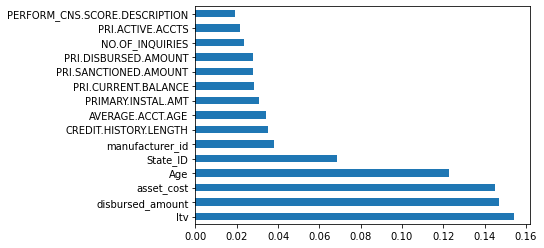

In [56]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### we will select these variables for our analysis

In [57]:
feat_importances.nlargest(15)

ltv                              0.154338
disbursed_amount                 0.146882
asset_cost                       0.145073
Age                              0.122738
State_ID                         0.068434
manufacturer_id                  0.038025
CREDIT.HISTORY.LENGTH            0.035160
AVERAGE.ACCT.AGE                 0.034327
PRIMARY.INSTAL.AMT               0.030997
PRI.CURRENT.BALANCE              0.028137
PRI.SANCTIONED.AMOUNT            0.027865
PRI.DISBURSED.AMOUNT             0.027858
NO.OF_INQUIRIES                  0.023277
PRI.ACTIVE.ACCTS                 0.021442
PERFORM_CNS.SCORE.DESCRIPTION    0.018920
dtype: float64

In [58]:
# here we will select the top 10 variables
new_train_df=train_df[['ltv','disbursed_amount','asset_cost','Age','State_ID','manufacturer_id','CREDIT.HISTORY.LENGTH','AVERAGE.ACCT.AGE','PRIMARY.INSTAL.AMT','PRI.CURRENT.BALANCE','PRI.DISBURSED.AMOUNT','PRI.SANCTIONED.AMOUNT','NO.OF_INQUIRIES','PRI.ACTIVE.ACCTS','PERFORM_CNS.SCORE.DESCRIPTION','loan_default']]
new_test_df=test_df[['ltv','disbursed_amount','asset_cost','Age','State_ID','manufacturer_id','CREDIT.HISTORY.LENGTH','AVERAGE.ACCT.AGE','PRIMARY.INSTAL.AMT','PRI.CURRENT.BALANCE','PRI.DISBURSED.AMOUNT','PRI.SANCTIONED.AMOUNT','NO.OF_INQUIRIES','PRI.ACTIVE.ACCTS','PERFORM_CNS.SCORE.DESCRIPTION']]

## we can now finally move to training our model 

## 1. Tree Based Models

In [59]:
new_train_df.columns

Index(['ltv', 'disbursed_amount', 'asset_cost', 'Age', 'State_ID',
       'manufacturer_id', 'CREDIT.HISTORY.LENGTH', 'AVERAGE.ACCT.AGE',
       'PRIMARY.INSTAL.AMT', 'PRI.CURRENT.BALANCE', 'PRI.DISBURSED.AMOUNT',
       'PRI.SANCTIONED.AMOUNT', 'NO.OF_INQUIRIES', 'PRI.ACTIVE.ACCTS',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'loan_default'],
      dtype='object')

In [60]:
X=new_train_df.drop(columns='loan_default')
y=new_train_df['loan_default']

In [61]:
def model_performance(model):
    model.fit(X_train,y_train)
    RF_training_labels = model.predict(X_train)
    RF_test_labels = model.predict(X_test)
    Training_accuracy = model.score(X_train, y_train, sample_weight=None)
    Test_accuracy = model.score(X_test, y_test, sample_weight=None)
    F1_score_train = f1_score(y_train, RF_training_labels, average = 'weighted')
    F1_score_test = f1_score(y_test, RF_test_labels, average = 'weighted')
    Recall_train = recall_score(y_train, RF_training_labels, average = 'weighted') 
    Recall_test  = recall_score(y_test, RF_test_labels, average = 'weighted') 
    Precision_train = precision_score(y_train, RF_training_labels, average = 'weighted')
    Precision_test = precision_score(y_test, RF_test_labels, average = 'weighted')
    accuracy_train = accuracy_score(y_train, RF_training_labels, )
    accuracy_test = accuracy_score(y_test, RF_test_labels)
    rf_cm_tr = confusion_matrix(y_train, RF_training_labels)
    rf_cm_te = confusion_matrix(y_test, RF_test_labels)
    print("Training_accuracy - ", Training_accuracy)
    print("Test_accuracy - ", Test_accuracy)
    print("F1_score_train - ", F1_score_train)
    print("F1_score_test - ", F1_score_test)
    print("Recall_train - ", Recall_train)
    print("Recall_test - ", Recall_test)
    print("Precision_train - ", Precision_train)
    print("Precision_test - ", Precision_test)
    #Confusion Matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(rf_cm_te), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Test Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    

## Model fitting

Training_accuracy -  0.9991850839731139
Test_accuracy -  0.6675625830986318
F1_score_train -  0.9991845957078178
F1_score_test -  0.6714622135778423
Recall_train -  0.9991850839731139
Recall_test -  0.6675625830986318
Precision_train -  0.9991856218129976
Precision_test -  0.675599728801509
None
Training_accuracy -  0.9740452309030863
Test_accuracy -  0.7586029422276866
F1_score_train -  0.9734737702782055
F1_score_test -  0.7022277242263882
Recall_train -  0.9740452309030863
Recall_test -  0.7586029422276866
Precision_train -  0.9746945040355879
Precision_test -  0.683708652372277
None
Training_accuracy -  0.9991789567849418
Test_accuracy -  0.7723705090997469
F1_score_train -  0.9991787384453799
F1_score_test -  0.6984221910660096
Recall_train -  0.9991789567849418
Recall_test -  0.7723705090997469
Precision_train -  0.999178818839259
Precision_test -  0.6876222260642862
None
Training_accuracy -  0.7828585783698003
Test_accuracy -  0.7820635624115402
F1_score_train -  0.6898085281412

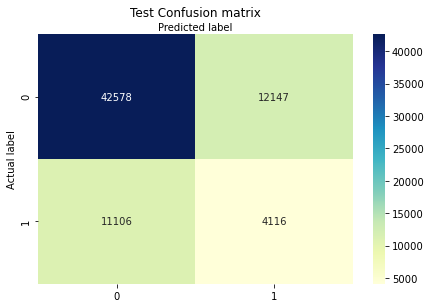

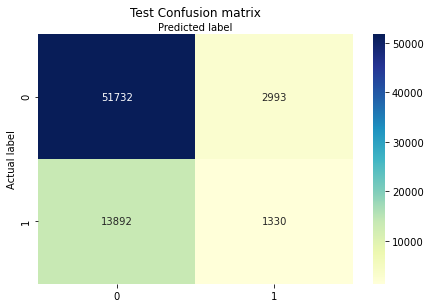

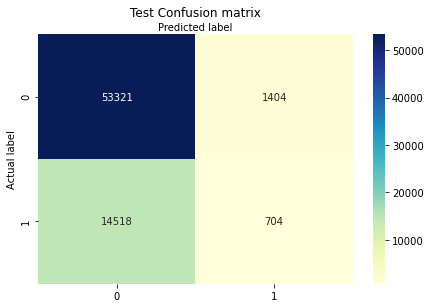

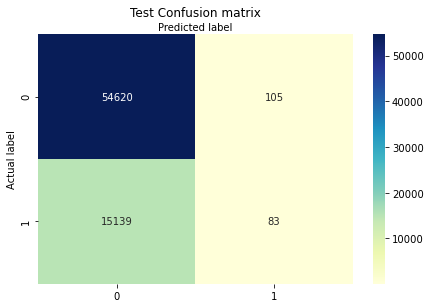

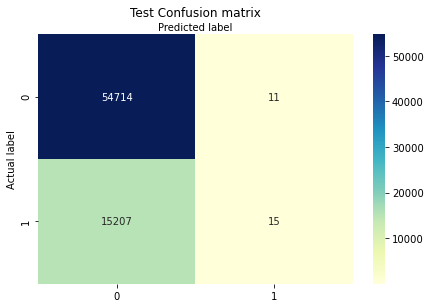

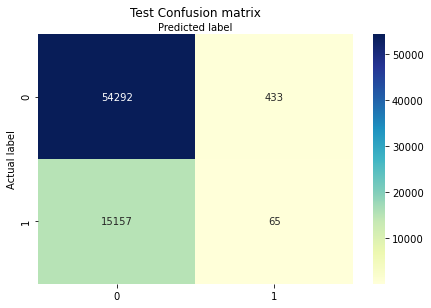

In [62]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

len(X_train)
len(X_test)



m1 = tree.DecisionTreeClassifier()
m2 = BaggingClassifier()
m3 = RandomForestClassifier()
m4 = AdaBoostClassifier()
m5 = GradientBoostingClassifier()
m6= GaussianNB()

models=[m1,m2,m3,m4,m5,m6]

for i in range(0,len(models)):
   print(model_performance(models[i]))
    


### Here we will select the model that has high accuracy, high TN and FN and equal ration of FP and FN .. so now lets look at 

#1 DT : this model looks good as it has high TP and almost equal ratio of FN and FP but it has low TN
#2 Bagging : Ratio of FN and FP is high ---need to discard
#3 RandomForestClassifier : Ratio of FN and FP is high ---need to discard
#4 AdaBoostClassifier :Ratio of FN and FP is high ---need to discard
#5 Gradient Boosting : Ratio of FN and FP is high ---need to discard
#6 GNB : very high amount of FP we will discard this model

### hence here we can only go with DT rest all models will certainly misclassify . we can try pruning for imrpving the model but before lets try distance based models

### note: here hyper parameter optimization for ensemble models was not possible because my pc was overheating and was taking a lot of time during the tuning process



## 2. Distance based models


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training_accuracy -  0.7824021702417396
Test_accuracy -  0.785035705860908
F1_score_train -  0.6868957069205921
F1_score_test -  0.6904971787993526
Recall_train -  0.7824021702417396
Recall_test -  0.785035705860908
Precision_train -  0.7209544400705472
Precision_test -  0.616281059476534
None
Training_accuracy -  0.8057880261415482
Test_accuracy -  0.7423602324633827
F1_score_train -  0.7712967597991341
F1_score_test -  0.6973520852886791
Recall_train -  0.8057880261415482
Recall_test -  0.7423602324633827
Precision_train -  0.7813254954947163
Precision_test -  0.6738161306215947
None


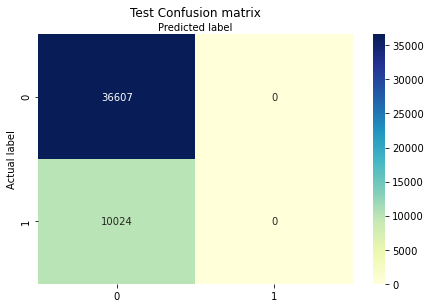

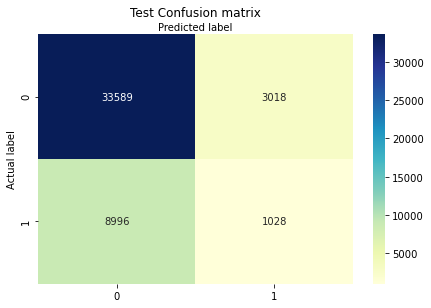

In [65]:
m1 = LogisticRegression()
m2 = KNeighborsClassifier()

models=[m1,m2]
for i in range(0,len(models)):
   print(model_performance(models[i]))

## Here we can see that KNN performs better however not as good as DT so hence we will 

## pruning 

In [66]:

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [67]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [68]:
ccp_alphas

array([0.        , 0.        , 0.        , ..., 0.00085706, 0.00122154,
       0.00270908])

In [69]:

#clfs = []
#for ccp_alpha in ccp_alphas:
#    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#    clf.fit(X_train, y_train)
#    clfs.append(clf)
#print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
#      clfs[-1].tree_.node_count, ccp_alphas[-1]))

## the above steps have taken a lot of time and yielded no results since the dataset is large its diffcult to do DT prunining hence training the model as it is

In [70]:
predictions = clf.predict(new_test_df)

In [71]:
y_pred=pd.DataFrame(predictions)

In [72]:
new_test_df['predicted default on loan']=y_pred

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Finally Submission !!

In [73]:
new_test_df.to_csv(r'C:\Users\Admin\Desktop\Data_science_projects\Submissions.csv', index = False)


## Challenges faced during this modelling task
## 1. Not too much familiar with financial data but eager to learn more
## 2. No margin to do hyperparameter tuning as pc is not configured for such task in a big dataset

### Appreciation note  :

### I would like to thank growth source financial technologies for giving me this task it was indeed challenging and made me learn new things. 